In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [8]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
94,5.6,2.7,4.2,1.3,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor


In [11]:
class_counts = df['Species'].value_counts()
print(class_counts)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [1]:
plt.figure(figsize=(10,6))
plt.bar(class_counts.index, class_counts.values,color='skyblue')
plt.xlabel("Species")
plt.ylabel("Counts")
plt.title("class Distribution")
plt.grid(axis='y', linestyle='--',alpha=0.5)
plt.savedfig('class distribution.svg', formats='svg')
plt.show()

NameError: name 'plt' is not defined

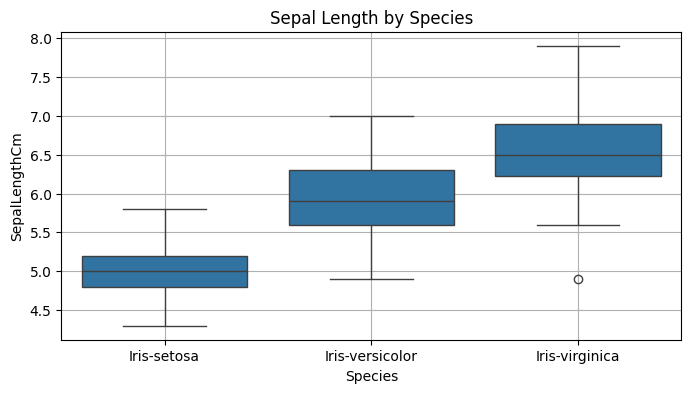

In [20]:
# visualize with boxplot

plt.figure(figsize=(8,4))
sns.boxplot(df, x='Species', y='SepalLengthCm')
plt.title("Sepal Length by Species")
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

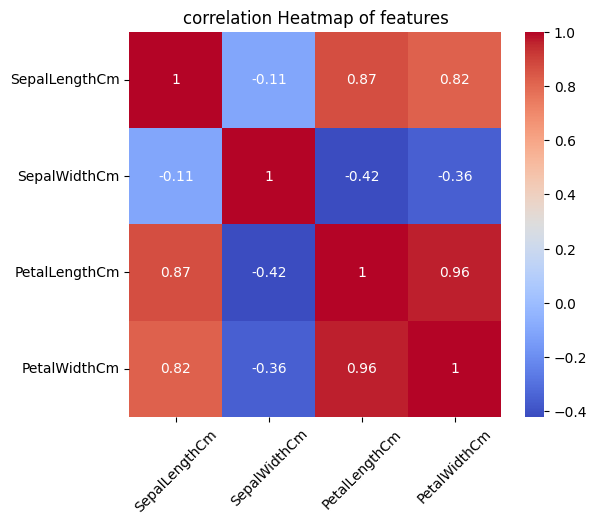

In [ ]:
# plot correlation Heatmap

plt.figure(figsize=(6,5))
plt.xticks(rotation=45)   # => for rotaion
sns.heatmap(df.drop(columns=['Species']).corr(), annot=True, cmap='coolwarm')
plt.title("correlation Heatmap of features")
plt.show

In [25]:
X = df.drop (columns=['Species'])
y = df['Species']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42
)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix



In [ ]:
#1 intialize the classifier
knn_model = KNeighborsClassifier(n_neighbors=7)

#2 train the classifier
knn_model.fit(X_train, y_train)

#3 get the predictions
knn_preds = knn_model.predict(X_test)

#4 diaplay the metrics
print("Accuracy=", accuracy_score(y_test, knn_preds)*100)

Accuracy= 96.66666666666667


In [30]:
print(classification_report(y_test, knn_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



<function matplotlib.pyplot.show(close=None, block=None)>

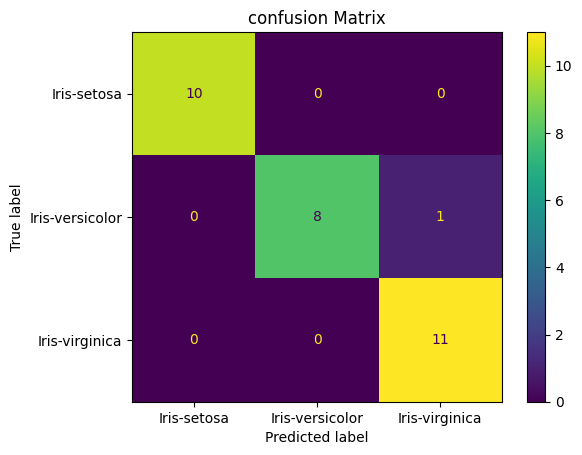

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn_preds)
cm_plot =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
cm_plot.plot()
plt.title("confusion Matrix")
plt.show

In [32]:
((knn_preds == y_test).sum()/len(y_test))*100

np.float64(96.66666666666667)

In [ ]:
import joblib
joblib.dump(knn_model, 'knn_model.pkl')
print("SUCESSS")

['knn_model.pkl']